In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import models
import utils

In [2]:
def bezier(p, steps=100):
    t = np.linspace(0, 1, steps).reshape(-1, 1)
    curve = np.power(1-t, 3)*p[0] + 3*np.power(1-t, 2)*t*p[1] + 3*(1-t)*np.power(t, 2)*p[2] + np.power(t, 3)*p[3]
    return curve

In [9]:
model = models.CNP((7, 16), 256, 2, 0.01)

In [10]:
state_dict = torch.load("save/deneme1/model.pt")

In [12]:
model.load_state_dict(state_dict["model_state_dict"])

<All keys matched successfully>

In [13]:
model.eval()

CNP(
  (encoder): Sequential(
    (0): Linear(in_features=23, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=256, bias=True)
  )
  (query): Sequential(
    (0): Linear(in_features=263, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=32, bias=True)
  )
)

In [15]:
data = torch.load("initial_data/data.pt")

In [16]:
data["salimdemet1_0.csv"].shape

torch.Size([6482, 17])

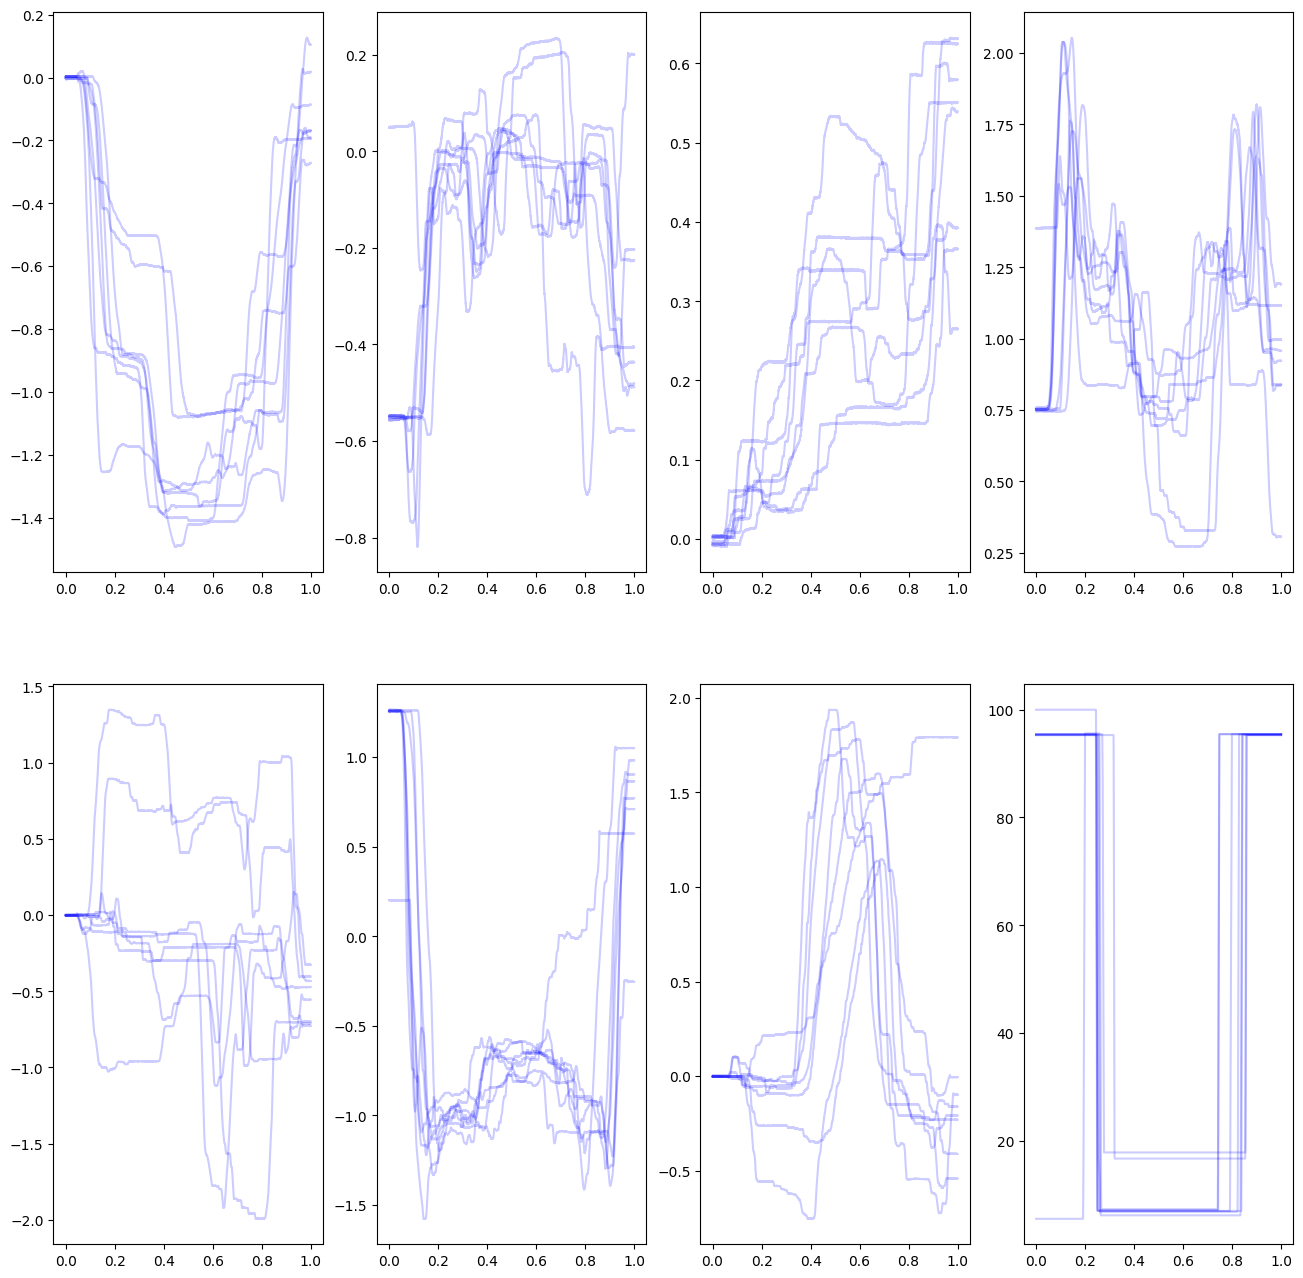

In [18]:
fig, ax = plt.subplots(2, 4, figsize=(16, 16))
for x in range(8):
    for i in range(2):
        for j in range(4):
            it = i * 4 + j
            ax[i][j].plot(data[f"salimdemet1_{x}.csv"][:, 0], data[f"salimdemet1_{x}.csv"][:, it+1], c="b", alpha=0.2)

In [19]:
traj = data["salimdemet1_0.csv"]

In [29]:
traj

tensor([[[ 0.0000e+00,  3.0680e-03,  4.9087e-02,  ...,  1.7641e-01,
           4.2184e-03,  1.0000e+02],
         [ 1.5430e-04,  3.4515e-03,  4.9854e-02,  ...,  1.7602e-01,
           4.6019e-03,  1.0000e+02],
         [ 3.0859e-04,  3.8350e-03,  4.9471e-02,  ...,  1.7526e-01,
           4.2184e-03,  1.0000e+02],
         ...,
         [ 9.9969e-01, -1.6950e-01,  2.0133e-01,  ...,  1.7717e-01,
           1.1505e-03,  1.0000e+02],
         [ 9.9985e-01, -1.6912e-01,  2.0095e-01,  ...,  1.7794e-01,
           1.1505e-03,  1.0000e+02],
         [ 1.0000e+00, -1.6874e-01,  2.0095e-01,  ...,  1.7756e-01,
           1.1505e-03,  1.0000e+02]]])

In [20]:
traj = traj.unsqueeze(0)

In [21]:
print(traj[:, [0, 1, 2, -1, -2, -3]].shape)
print(traj[:, :, [0]].shape)

torch.Size([1, 6, 17])
torch.Size([1, 6482, 1])


In [57]:
mean, std = model(observation=traj[:, [0, 1, 2, -1, -2, -3]], target=traj[:, :, [0]])
mean = mean.detach()
std = std.detach()

In [24]:
observation=traj[:, [0, 1, 3000, 3001]]

In [25]:
observation.shape

torch.Size([1, 4, 17])

In [27]:
target=torch.tensor([
          [
              [0.1],
              [0.7],
              [0.7],
          ]
      ])

In [28]:
target.shape

torch.Size([1, 3, 1])

In [22]:
model(observation=traj[:, [0, 1, 3000, 3001]],
      target=torch.tensor([
          [
              [0.1],
              [0.7],
              [0.7],
          ]
      ]))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (4x17 and 23x256)

NameError: name 'mean' is not defined

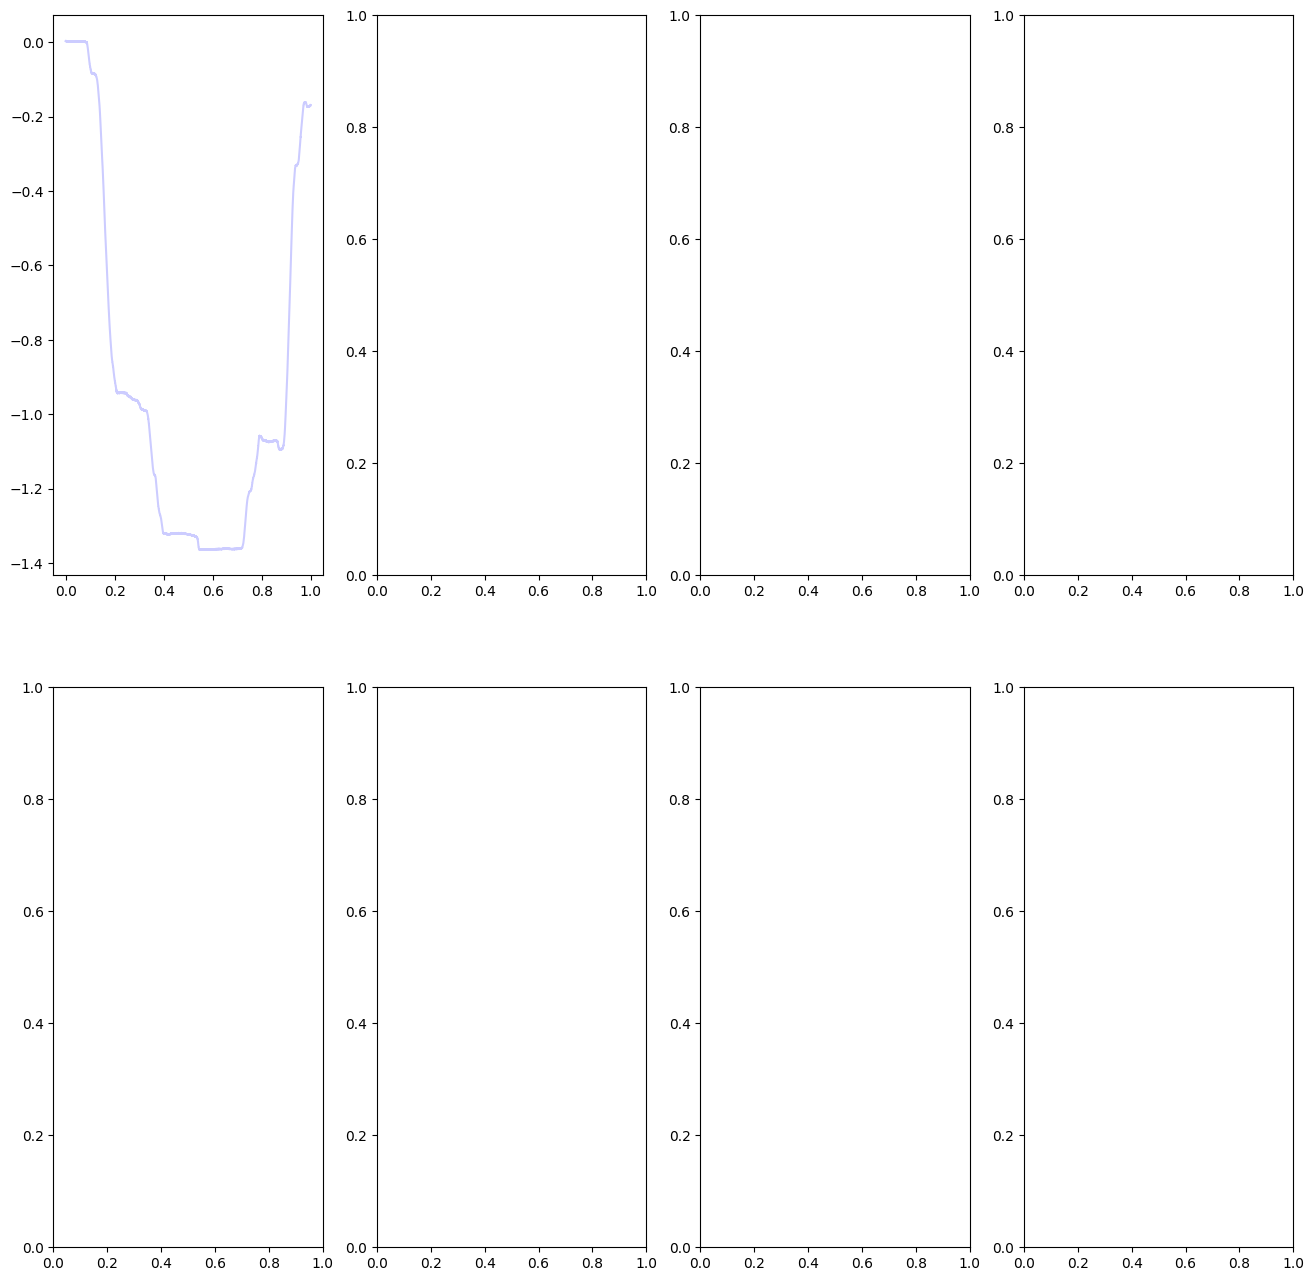

In [23]:
fig, ax = plt.subplots(2, 4, figsize=(16, 16))
for x in range(8):
    for i in range(2):
        for j in range(4):
            it = i * 4 + j
            ax[i][j].plot(data[f"salimdemet1_{x}.csv"][:, 0], data[f"salimdemet1_{x}.csv"][:, it+1], c="b", alpha=0.2)
            if x == 0:
                ax[i][j].plot(torch.linspace(0, 1, mean.shape[1]), mean[0][:, it], c="r")
                ax[i][j].fill_between(torch.linspace(0, 1, mean.shape[1]), mean[0][:, it] - std[0][:, it],
                                        mean[0][:, it] + std[0][:, it], color="r", alpha=0.2)